<a href="https://colab.research.google.com/github/tesygithub/Machine-Learning/blob/main/Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Import csv file and put the data in data variable name
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 1:- ML Appetizer/Day 7/SeoulBikeData.csv', encoding = 'unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w Seasons and Rented Bike Count**

In [ ]:
Seasons_and_Rented_Bike_Count = df.groupby('Seasons')['Rented Bike Count'].mean()
Seasons_and_Rented_Bike_Count

,Rented Bike Count
Seasons,
Autumn,819.597985
Spring,730.031250
Summer,1034.073370
Winter,225.541204


Text(0.5, 1.0, 'Relationship b/w Seasons and Rented Bike Count')

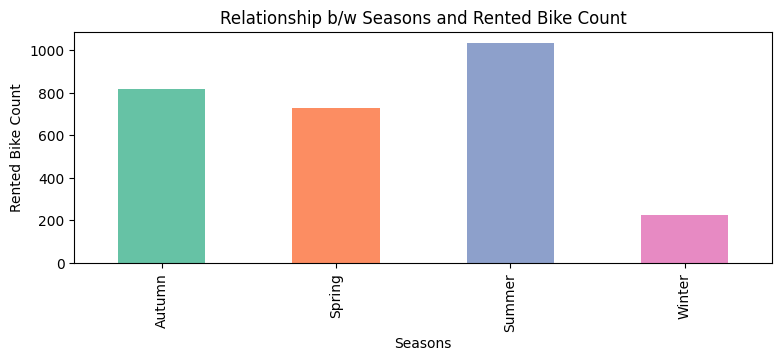

In [ ]:
plt.figure(figsize=(9,3))
Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Seasons and Rented Bike Count')

<Axes: ylabel='Rented Bike Count'>

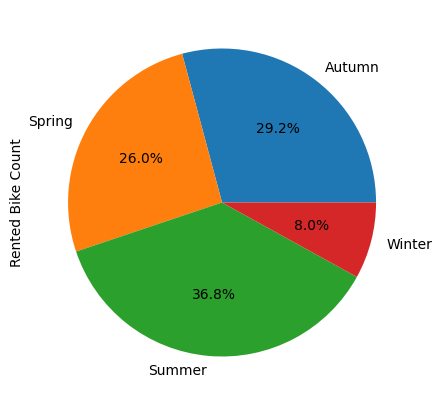

In [ ]:
plt.figure(figsize=(5, 5))
Seasons_and_Rented_Bike_Count.plot(kind = 'pie',autopct='%1.1f%%',color = sns.color_palette('Set2'))




In [ ]:
Seasons_and_Rented_Bike_Count = df.groupby('Seasons')['Rented Bike Count'].sum()
Seasons_and_Rented_Bike_Count

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


Text(0.5, 1.0, 'Relationship b/w Seasons and total Rented Bike Count')

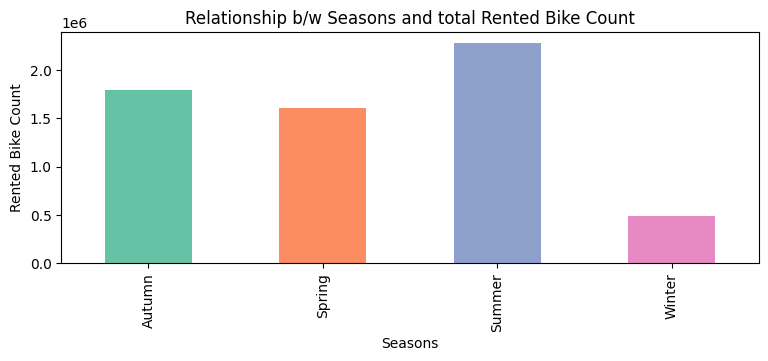

In [ ]:
plt.figure(figsize=(9,3))
Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Seasons and total Rented Bike Count')

#### **Relationship b/w Holiday Seasons and Rented Bike Count**

In [ ]:
Holiday_Seasons_and_Rented_Bike_Count = df.groupby('Holiday')['Rented Bike Count'].sum()
Holiday_Seasons_and_Rented_Bike_Count

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


<Axes: ylabel='Rented Bike Count'>

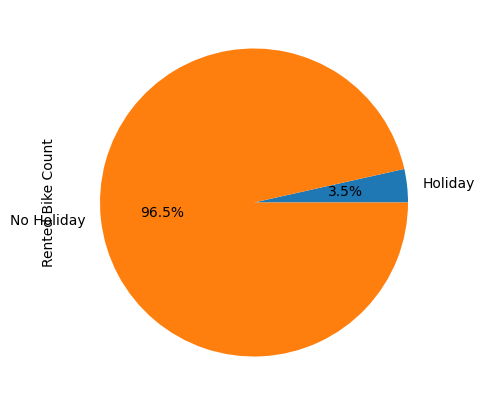

In [ ]:
plt.figure(figsize=(5, 5))
Holiday_Seasons_and_Rented_Bike_Count.plot(kind = 'pie',autopct='%1.1f%%',color = sns.color_palette('Set2'))

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
Holiday_Seasons_and_Rented_Bike_Count = df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
Holiday_Seasons_and_Rented_Bike_Count

Seasons,Autumn,Spring,Summer,Winter
Holiday,,,,
Holiday,91018,45742,49063,30072
No Holiday,1698984,1566167,2234171,457097


Text(0.5, 1.0, 'Relationship b/w Holiday and Seasons')

<Figure size 800x600 with 0 Axes>

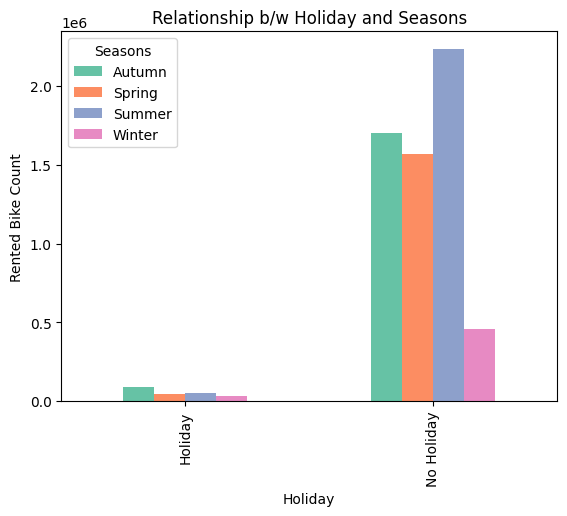

In [ ]:
plt.figure(figsize=(8, 6))
Holiday_Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Holiday and Seasons')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w seasons humidity and bike count**

Text(0, 0.5, 'Rented Bike Count')

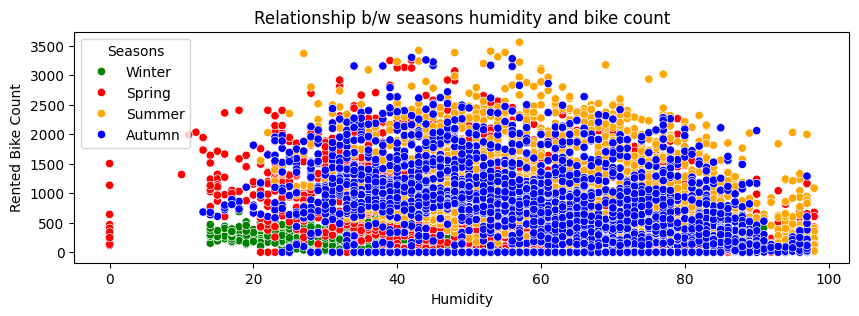

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Humidity(%)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons humidity and bike count')
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')

#### **Temperature, Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

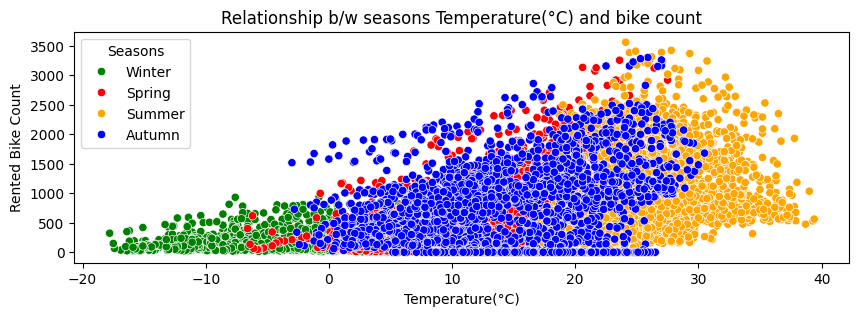

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Temperature(°C)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Temperature(°C) and bike count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')

#### **Wind speed (m/s), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

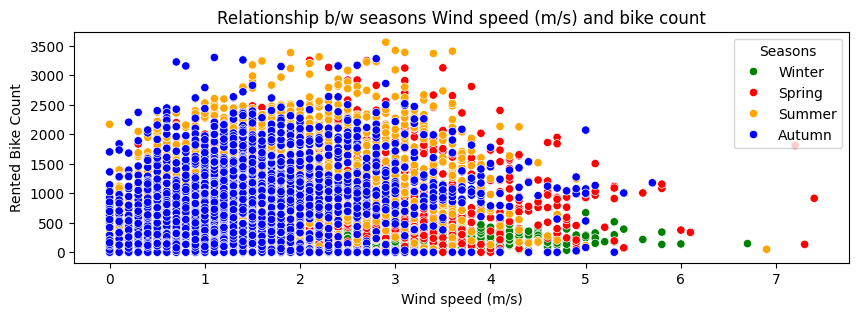

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Wind speed (m/s)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Wind speed (m/s) and bike count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')

#### **Visibility (10m), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

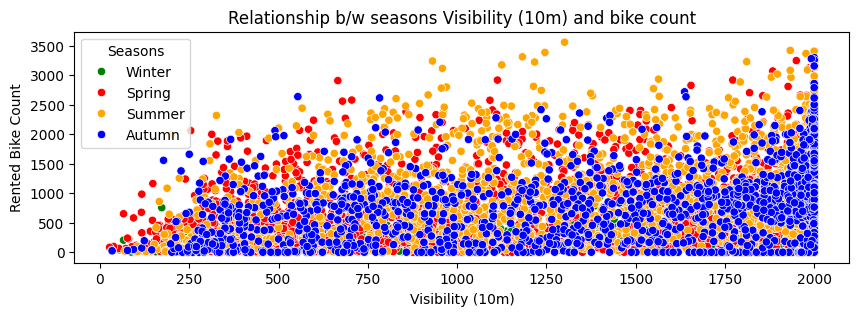

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Visibility (10m)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Visibility (10m) and bike count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')

#### **Solar Radiation (MJ/m2), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

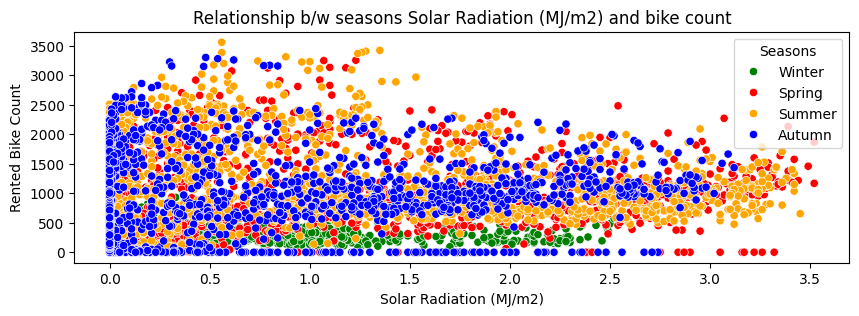

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Solar Radiation (MJ/m2)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Solar Radiation (MJ/m2) and bike count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')

#### **Rainfall(mm), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

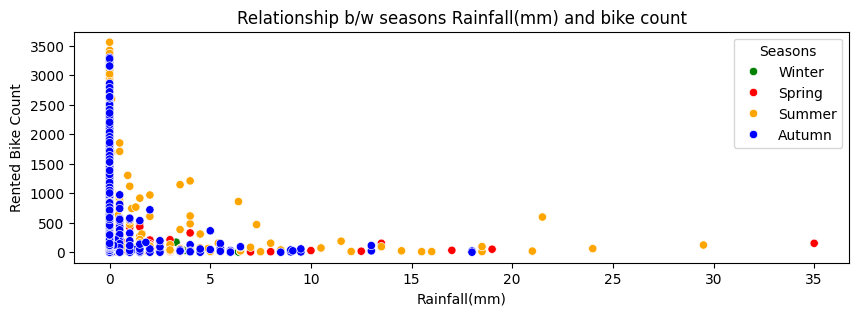

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Rainfall(mm)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Rainfall(mm) and bike count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')

#### **Snowfall, Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

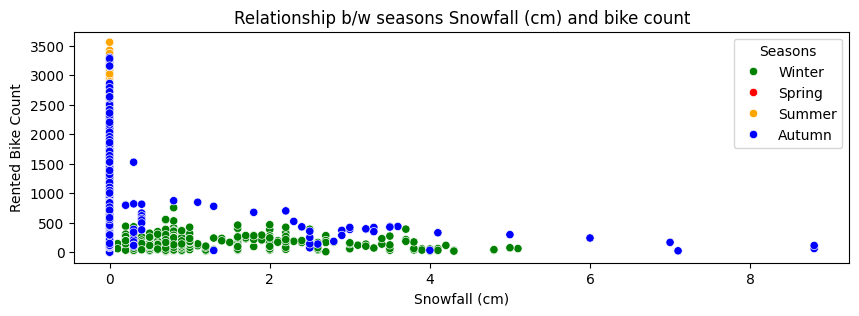

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Snowfall (cm)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Snowfall (cm) and bike count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Hour, Rented Bike Count for diffrent Seasons**

In [ ]:
bike_and_Hour = df.groupby('Hour')['Rented Bike Count'].sum()
bike_and_Hour

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


Text(0, 0.5, 'Rented Bike Count')

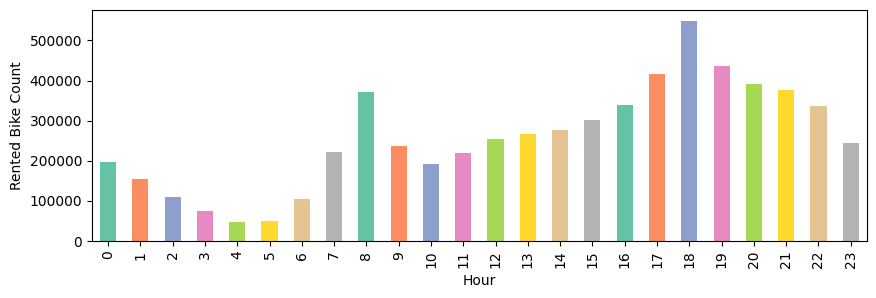

In [ ]:
plt.figure(figsize=(10,3))
bike_and_Hour.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

#### **month, Rented Bike Count for diffrent Seasons**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format= '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['month'] = df['Date'].dt.month
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


Text(0.5, 1.0, 'Relationship b/w month and bike count')

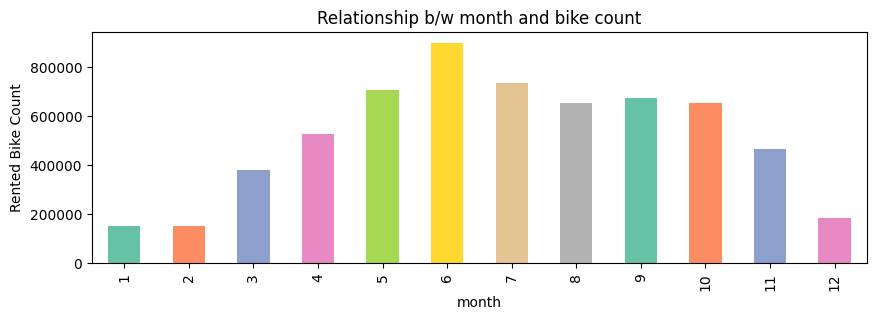

In [ ]:
month_count = df.groupby('month')['Rented Bike Count'].sum()
plt.figure(figsize=(10,3))
month_count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('month')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w month and bike count')

#### **Functioning Day, Rented Bike Count**

In [ ]:
Functioning_Day = df.groupby('Functioning Day')['Rented Bike Count'].sum()
Functioning_Day

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


Text(0.5, 1.0, 'Relationship b/w Functioning Day and bike count')

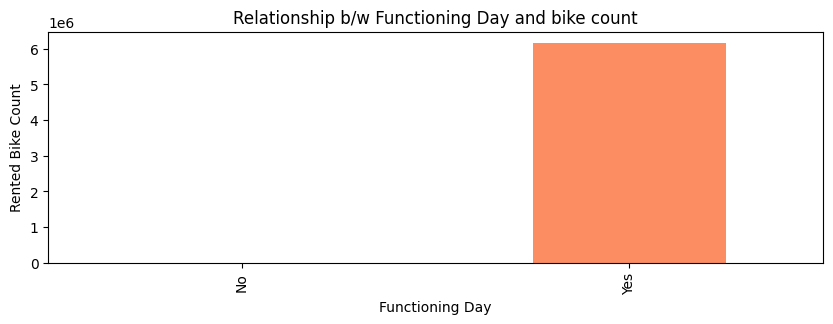

In [ ]:
plt.figure(figsize=(10,3))
Functioning_Day.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Functioning Day and bike count')

## **Feature Engineering**

In [ ]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

### **Histogram plot**

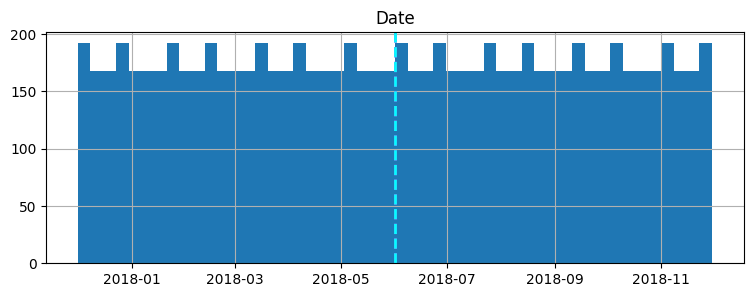

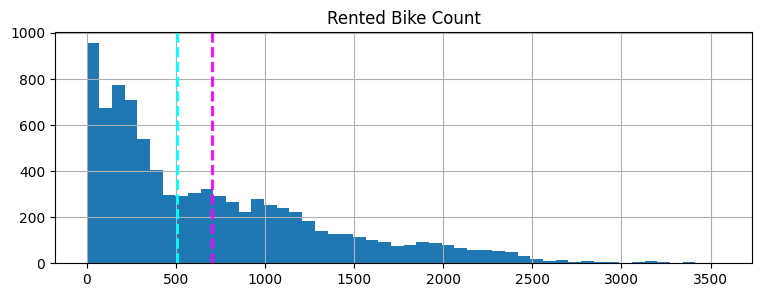

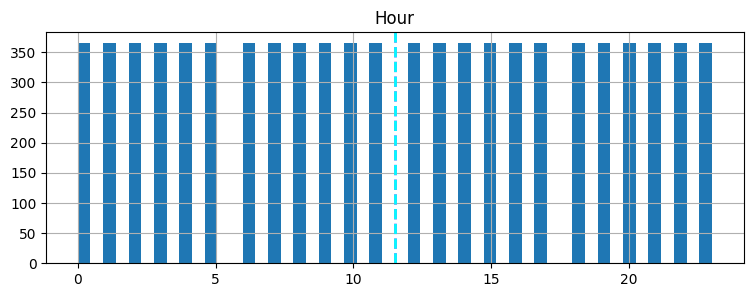

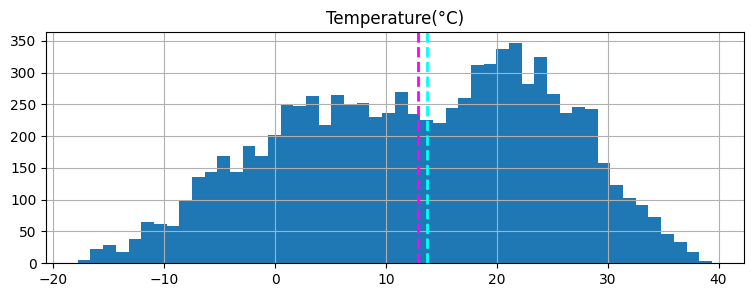

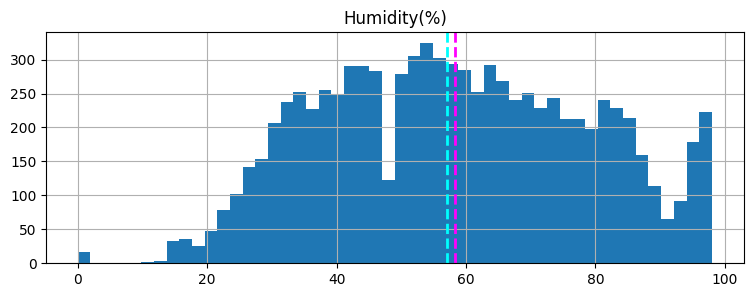

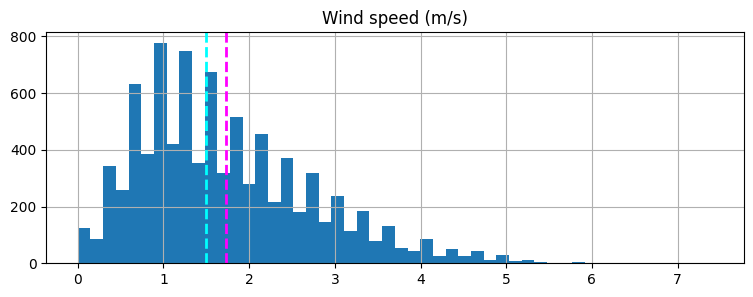

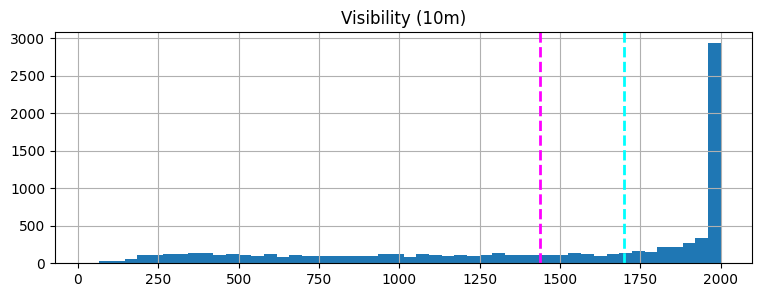

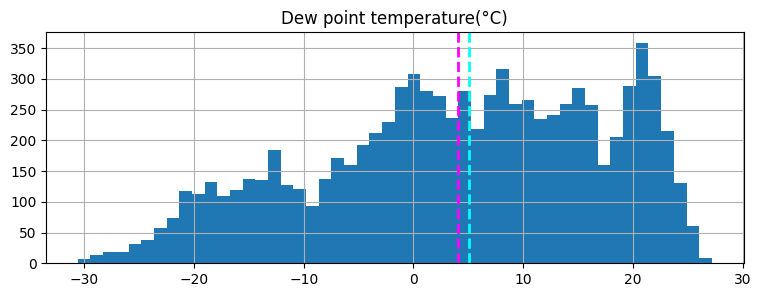

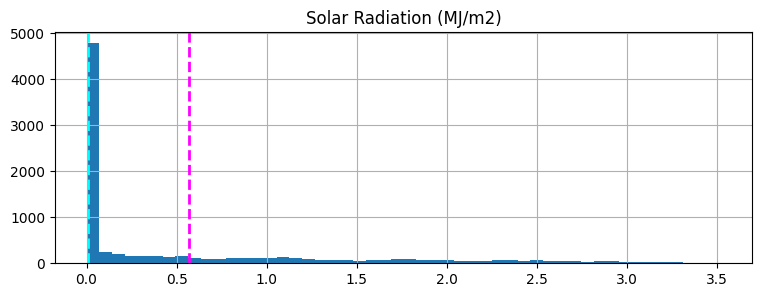

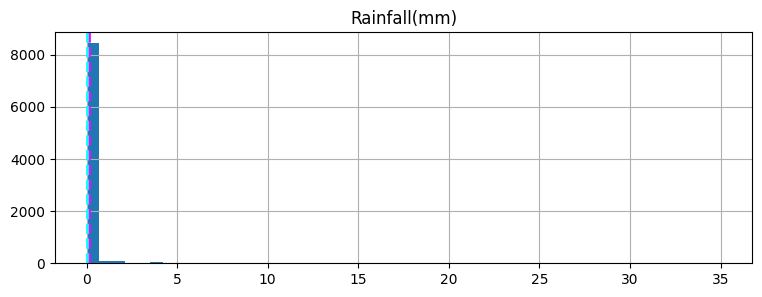

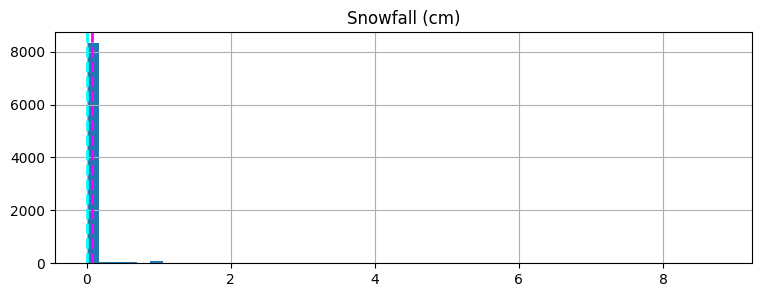

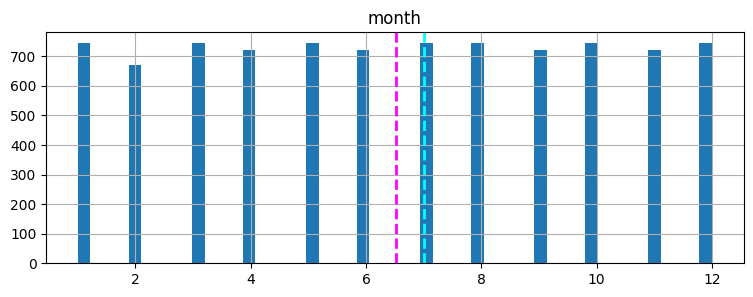

In [ ]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

### **Correlation & scatter  plot 'Rented Bike Count'**

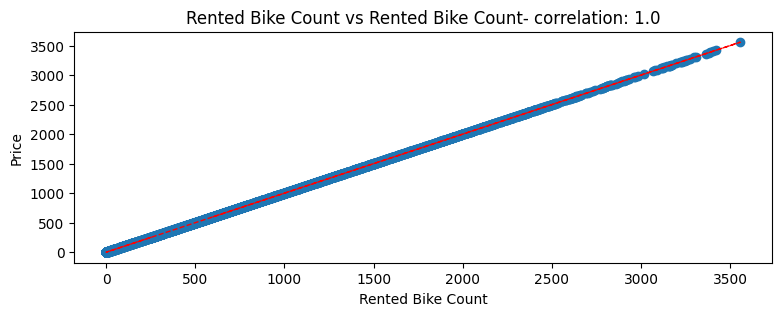

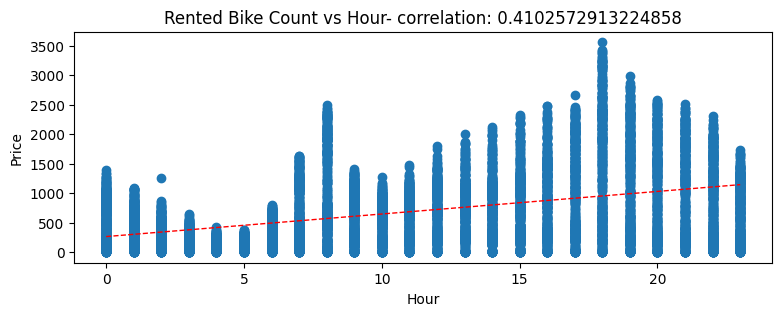

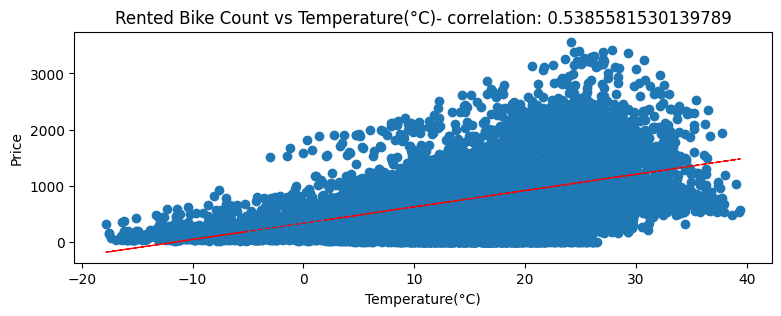

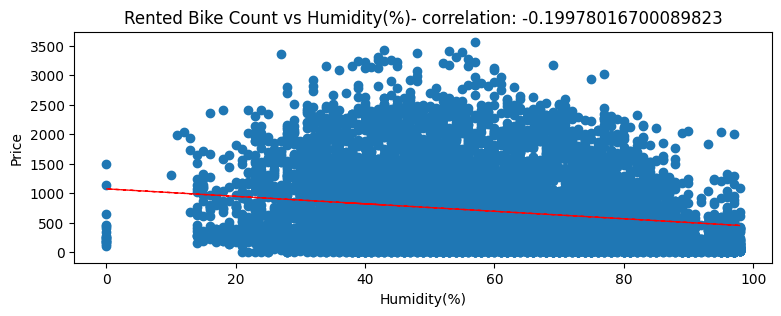

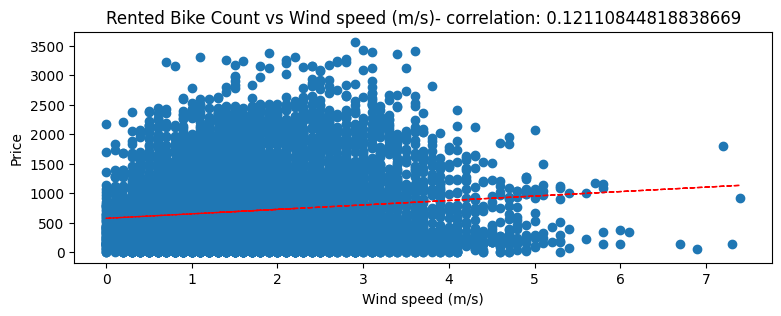

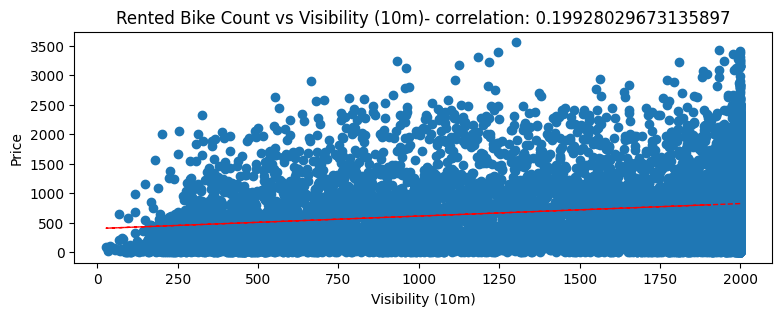

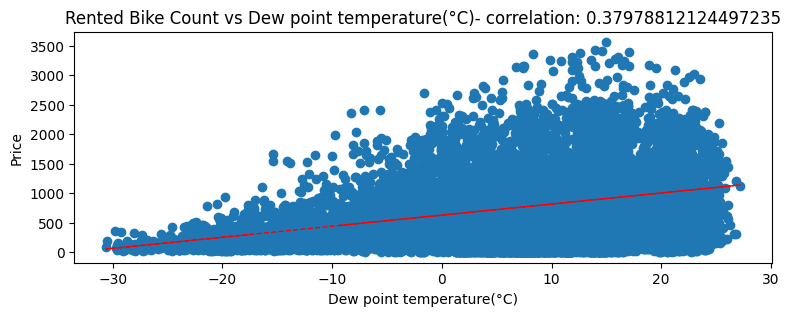

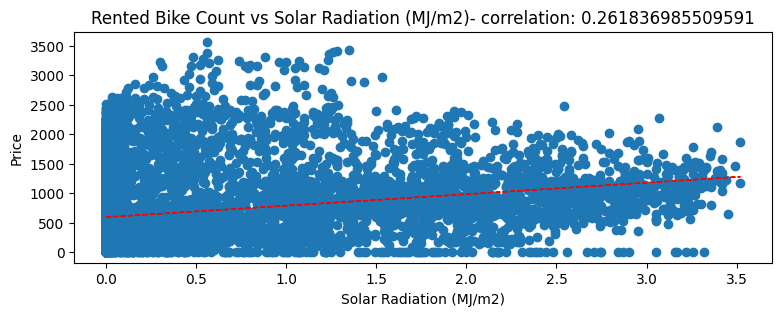

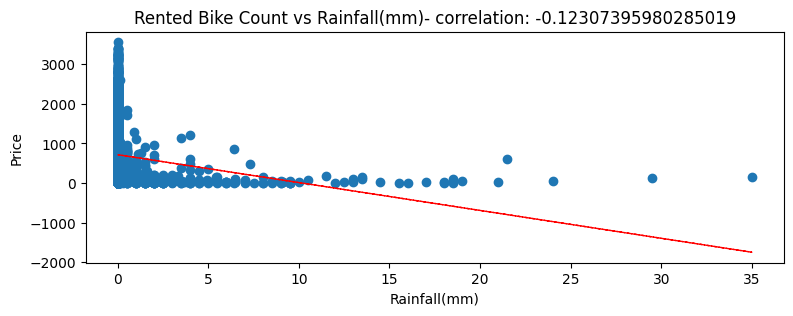

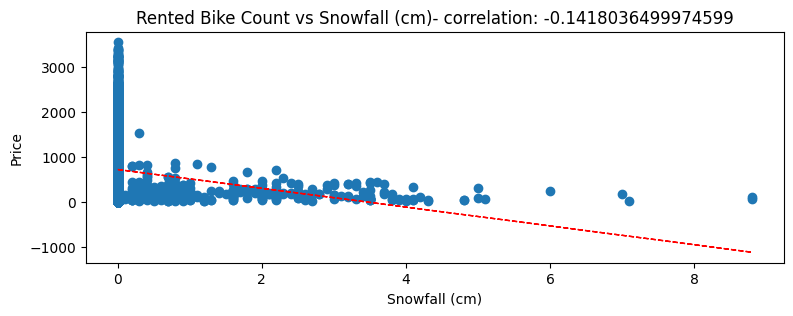

In [ ]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature =(df[col])
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)


plt.show()

### **Feature incoding And creation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['day_name'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()
df['year_name'] = df['Date'].map(lambda x: x.year).astype("object")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name,month_name,year_name
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,December,2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.drop(columns = ['Date','month'],inplace = True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_name', 'month_name', 'year_name'],
      dtype='object')

In [ ]:
df['week'] = df['day_name'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_name,month_name,year_name,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,Weekdays
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,Weekdays
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,Weekdays
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,Weekdays


Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

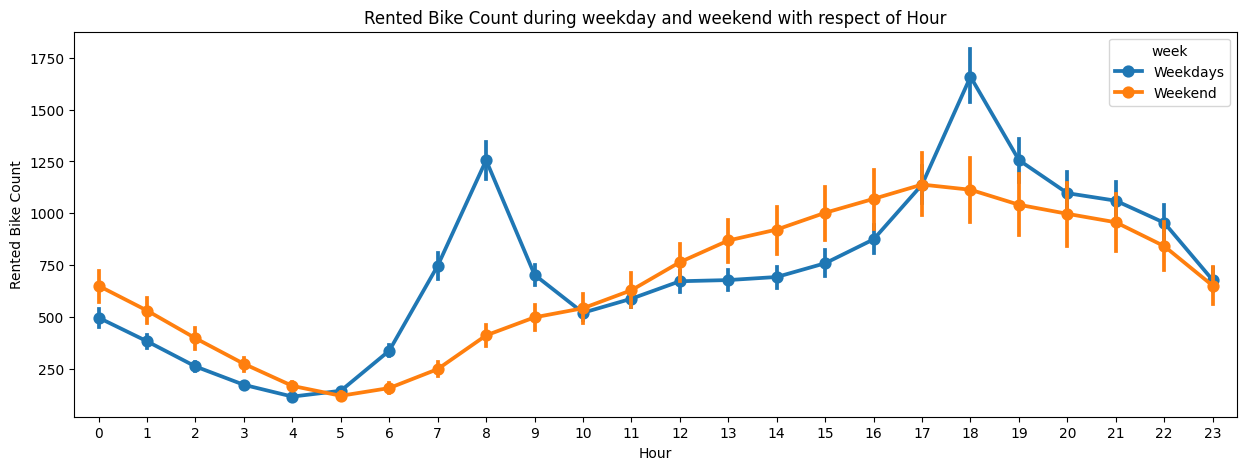

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x = 'Hour', y = 'Rented Bike Count', hue = 'week', data = df)
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [ ]:
df.drop(columns = ['day_name'],inplace = True)

**Lets do some feature engineering on Hour column**

In [ ]:
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [ ]:
df['Hour'] = df['Hour'].apply(hour)

In [ ]:
df['Hour'].value_counts()

,count
Hour,
Night,2920
Noon,2190
Evening,2190
Morning,1460


### **Features Selections**

#### **Correlation**

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])

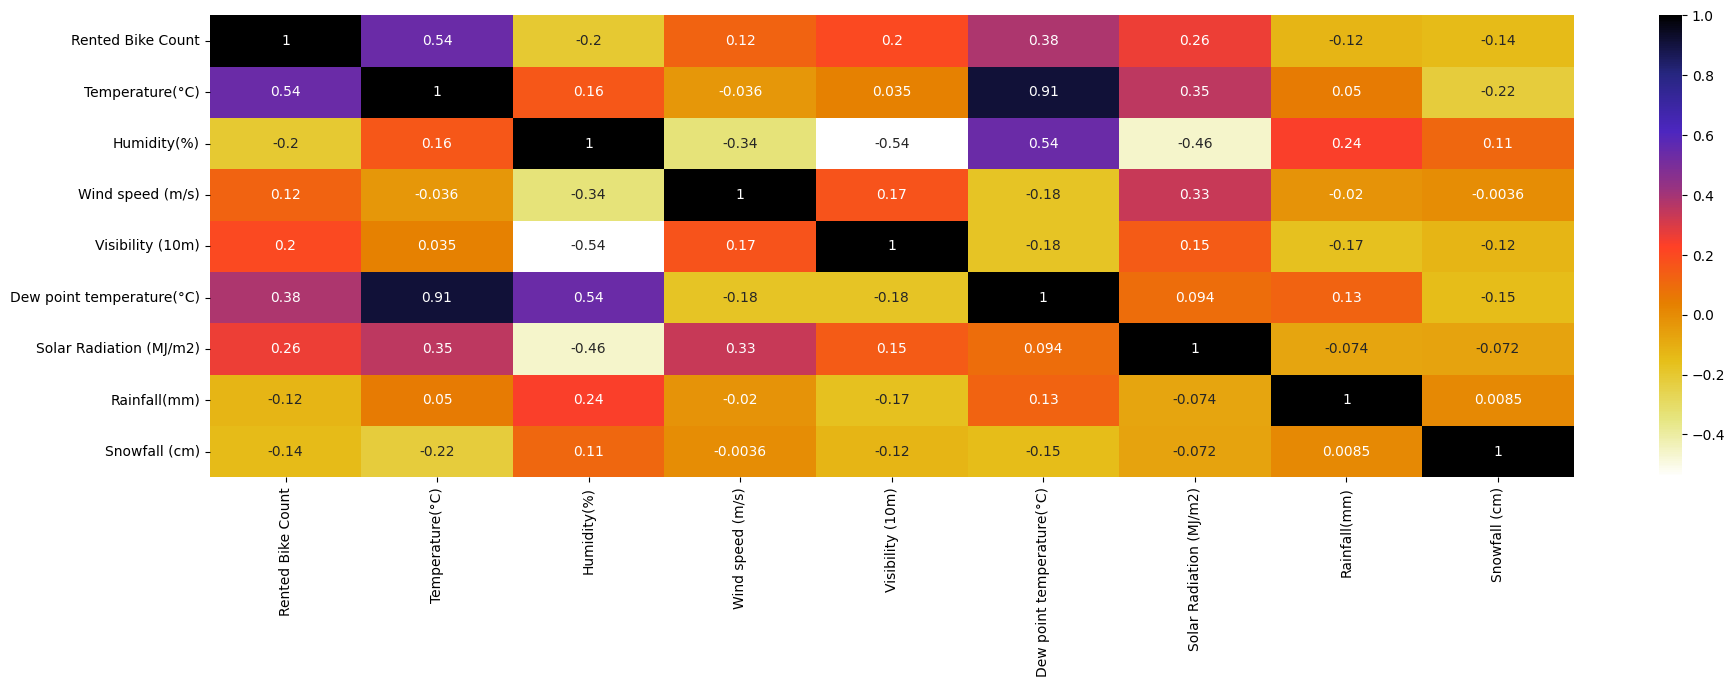

In [ ]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,6))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month_name', 'year_name', 'week'],
      dtype='object')

In [ ]:
df.drop(columns = ['Dew point temperature(°C)'],inplace = True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'month_name', 'year_name', 'week'],
      dtype='object')

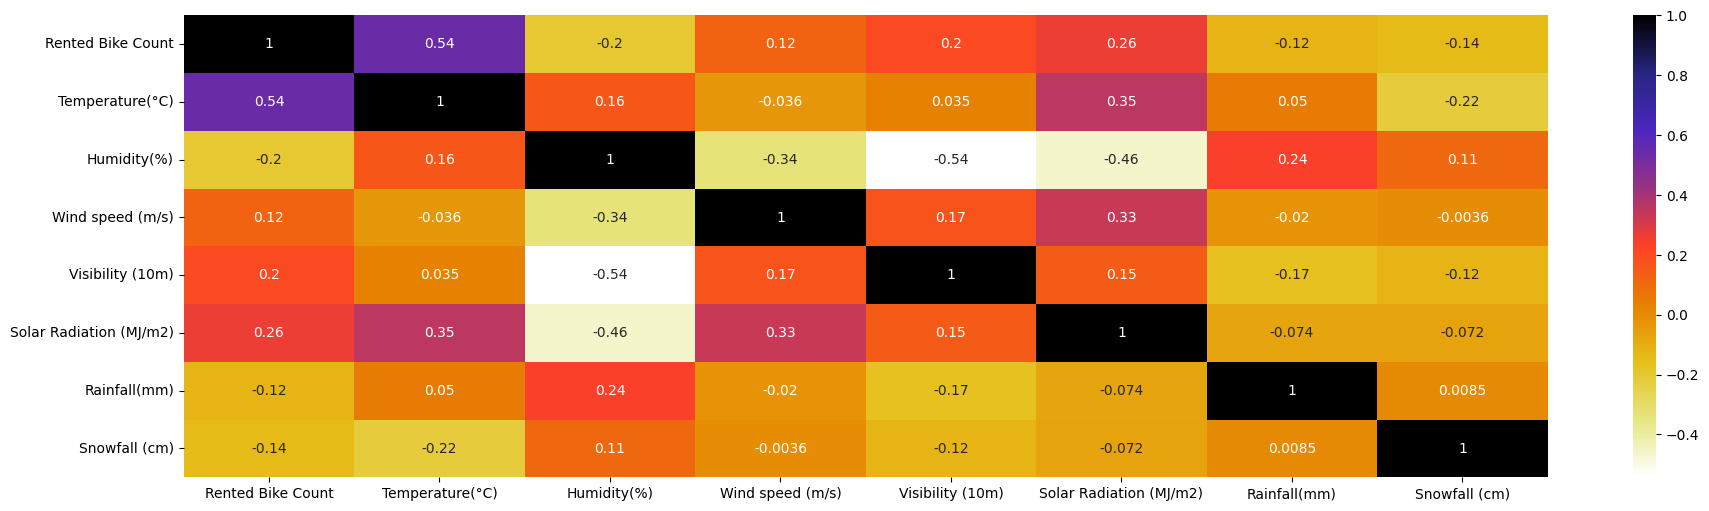

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(22,6))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## **Data Pre-processing**

### **Feature Scaling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   object 
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month_name               8760 non-null   object 
 13  year_name                8760 non-null   object 
 14  week                    

In [ ]:
df = pd.get_dummies(df,drop_first = True,sparse=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Rented Bike Count        8760 non-null   int64              
 1   Temperature(°C)          8760 non-null   float64            
 2   Humidity(%)              8760 non-null   int64              
 3   Wind speed (m/s)         8760 non-null   float64            
 4   Visibility (10m)         8760 non-null   int64              
 5   Solar Radiation (MJ/m2)  8760 non-null   float64            
 6   Rainfall(mm)             8760 non-null   float64            
 7   Snowfall (cm)            8760 non-null   float64            
 8   Hour_Morning             1 non-null      Sparse[bool, False]
 9   Hour_Night               1 non-null      Sparse[bool, False]
 10  Hour_Noon                1 non-null      Sparse[bool, False]
 11  Seasons_Spring           1 non

<ipython-input-68-e749a4438c2e>:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [ ]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_Morning,Hour_Night,...,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_name_2018,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False


**transforming X_train and X_test**

In [ ]:
x = df.drop(columns = ['Rented Bike Count'])
y = df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#### **Scaling the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


## **Model Implementation**

### **Import Dependancy**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:

      # ploting the graph of feature importance

      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.6670596548917538
MAE : 291.24905238432336
MSE : 143620.41631326464
RMSE : 378.972843767551
R2 : 0.6552941000903316
Adjusted R2 :  0.6496923791399714 

********************************************************************************
coefficient 
 [ 303.90293949  -68.12626771   17.76705218   36.85627161   70.2196655
 -121.68707514   14.10586839 -145.85432688 -292.77457219 -260.90143832
   -6.31190346  -16.06783976  -43.82255688   31.14685797  176.15347186
  -70.51222203   -4.26599989  -38.60873425  -26.59368248  -24.89254052
   71.29924072  -34.54774149   35.72898268   27.55687793   54.83043512
   20.0460703     4.26599989  -33.71820054]


Intercept  =  704.7678367579903


******************** ploting the graph of Actual and predicted only with 80 observation ********************


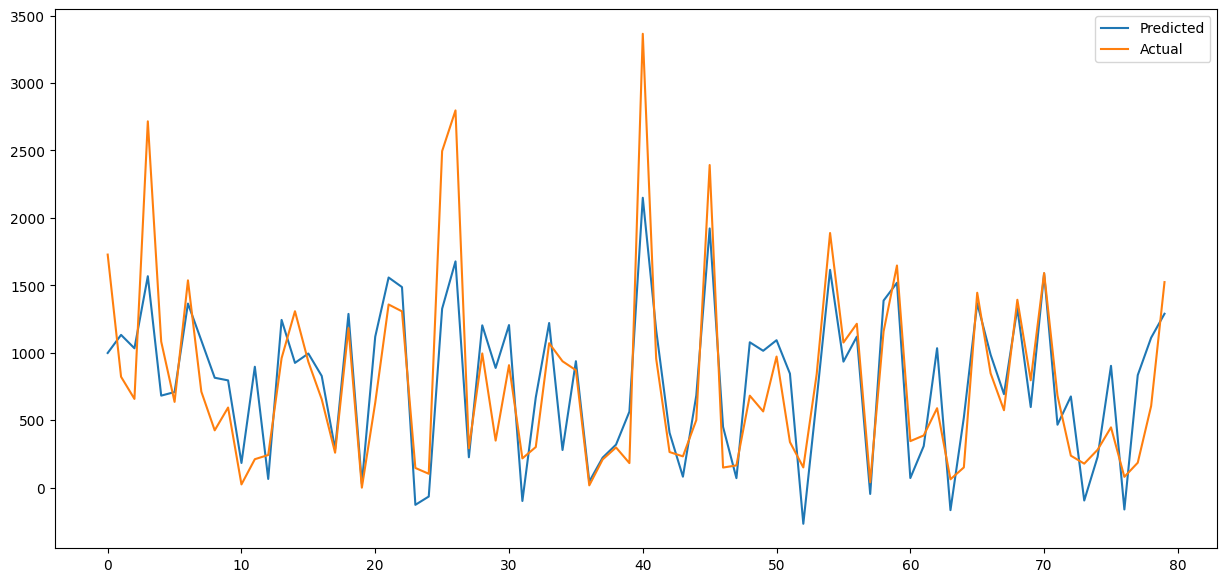

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)